# Meet the Smart Librarian: EDA

Our librarian is now **super-intelligent**—never tired, never forgets a book, and can predict your next read!

Before making recommendations, it needs to **explore the library** like a curious detective:

- **Readers**: Who are the daily bookworms, who just peek in?
- **Books**: Which are celebrities, which are hiding in the corners?
- **Ratings**: Are readers generous or picky?
- **Anomalies**: Misplaced records like lost books.
- **Trends**: Do reading habits change during holidays or exams?

This exploration teaches our AI **who likes what, which books shine, and which need attention**—its first lesson to becoming the ultimate librarian!

## AI Librarian Training Data Overview

Welcome to the **training grounds** of our AI Librarian! Before it can recommend the perfect book to every reader, it first needs to **explore the library like a curious detective**—and that world lives inside a few magical files:

---

## 📂 Core Files

1. **`interactions.csv`**
   - Contains user–item interaction history.
   - Example: who borrowed which books.

2. **`items.csv`**
   - Metadata for each item.
   - Includes fields such as title, author, subjects, etc.

3. **`sample_submission.csv`**
   - Provides an example of the **correct submission format**.

---

💡 **Fun tip**:
Think of the **interactions** as juicy gossip among readers, the **items** as the books’ personal stories, and the **sample submission** as the AI’s first report card—showing it’s ready to shine as the ultimate librarian!

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import src.config as config
from src.data_loader import load_interactions, load_items

config.set_plot_style()

## 1. Peek Inside the Data

Time for our AI Librarian to **peek inside the library files**! 📚

- Load `interactions.csv` and `items.csv`
- Take a quick look with `.head()`, `.info()`, `.describe()`
- Spot any missing values (lost books?)
- Check data types (are dates really dates, numbers really numbers?)

Think of this step as **the librarian opening the doors for the first time**, getting a feel for the shelves and the readers!

In [25]:
# Load datasets
interactions = load_interactions()
items = load_items()

# Quick look
print('First 5 rows of interactions:')
display(interactions.head())
print('First 5 rows of items:')
display(items.head())

First 5 rows of interactions:


,u,i,t
0,4456,8581,1.687541e+09
1,142,1964,1.679585e+09
2,362,3705,1.706872e+09
3,1809,11317,1.673533e+09
4,4384,1323,1.681402e+09


First 5 rows of items:


,Title,Author,ISBN Valid,Publisher,Subjects,i
0,Classification décimale universelle : édition ...,NaN,9782871303336; 2871303339,Ed du CEFAL,Classification décimale universelle; Indexatio...,0
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",9782278058327; 2278058320,Didier,didactique--langue étrangère - enseignement; d...,1
2,Histoire de vie et recherche biographique : pe...,NaN,2343190194; 9782343190198,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,2
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",9782365350020; 236535002X; 9782365350488; 2365...,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",9782702180815; 2702180817; 9782702183618; 2702...,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4


In [26]:
# Interactions overview
display(interactions.info())
display(interactions.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87047 entries, 0 to 87046
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   u       87047 non-null  int64  
 1   i       87047 non-null  int64  
 2   t       87047 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.0 MB


None

,count,mean,std,min,25%,50%,75%,max
u,87047.0,3.290828e+03,2.266663e+03,0.000000e+00,1.309000e+03,2.831000e+03,5.162000e+03,7.837000e+03
i,87047.0,6.804255e+03,4.441228e+03,0.000000e+00,2.843000e+03,6.482000e+03,1.062000e+04,1.529000e+04
t,87047.0,1.695743e+09,1.419829e+07,1.672664e+09,1.683051e+09,1.695917e+09,1.707222e+09,1.728925e+09


In [27]:
display(items.info())
display(items.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15291 entries, 0 to 15290
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       15291 non-null  object
 1   Author      12638 non-null  object
 2   ISBN Valid  14568 non-null  object
 3   Publisher   15266 non-null  object
 4   Subjects    13068 non-null  object
 5   i           15291 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 716.9+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Title,15291,14576,Oeuvres complètes /,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Author,12638,9357,"Pompéï, Christine",29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ISBN Valid,14568,14490,285036066X; 9782850360664,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Publisher,15266,4337,Gallimard,611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Subjects,13068,11521,Bandes dessinées,420,NaN,NaN,NaN,NaN,NaN,NaN,NaN
i,15291.0,NaN,NaN,NaN,7645.0,4414.275818,0.0,3822.5,7645.0,11467.5,15290.0


In [28]:
# Interactions duplicates
print("Duplicates in interactions:", interactions.duplicated().sum())

# Items duplicates
print("Duplicates in items:", items.duplicated().sum())

Duplicates in interactions: 2
Duplicates in items: 0


## 2. Time Analysis

In [29]:
# Convert timestamp to datetime (to see if it makes sense)
interactions['t_dt'] = pd.to_datetime(interactions['t'], unit='s', errors='coerce')
print(interactions['t_dt'].head())

0   2023-06-23 17:24:46
1   2023-03-23 15:30:06
2   2024-02-02 11:00:59
3   2023-01-12 14:19:22
4   2023-04-13 16:09:22
Name: t_dt, dtype: datetime64[ns]


### 2.1. Daily & Monthly Trends
- Seasonal patterns
- Exam-week spikes
- Quiet periods


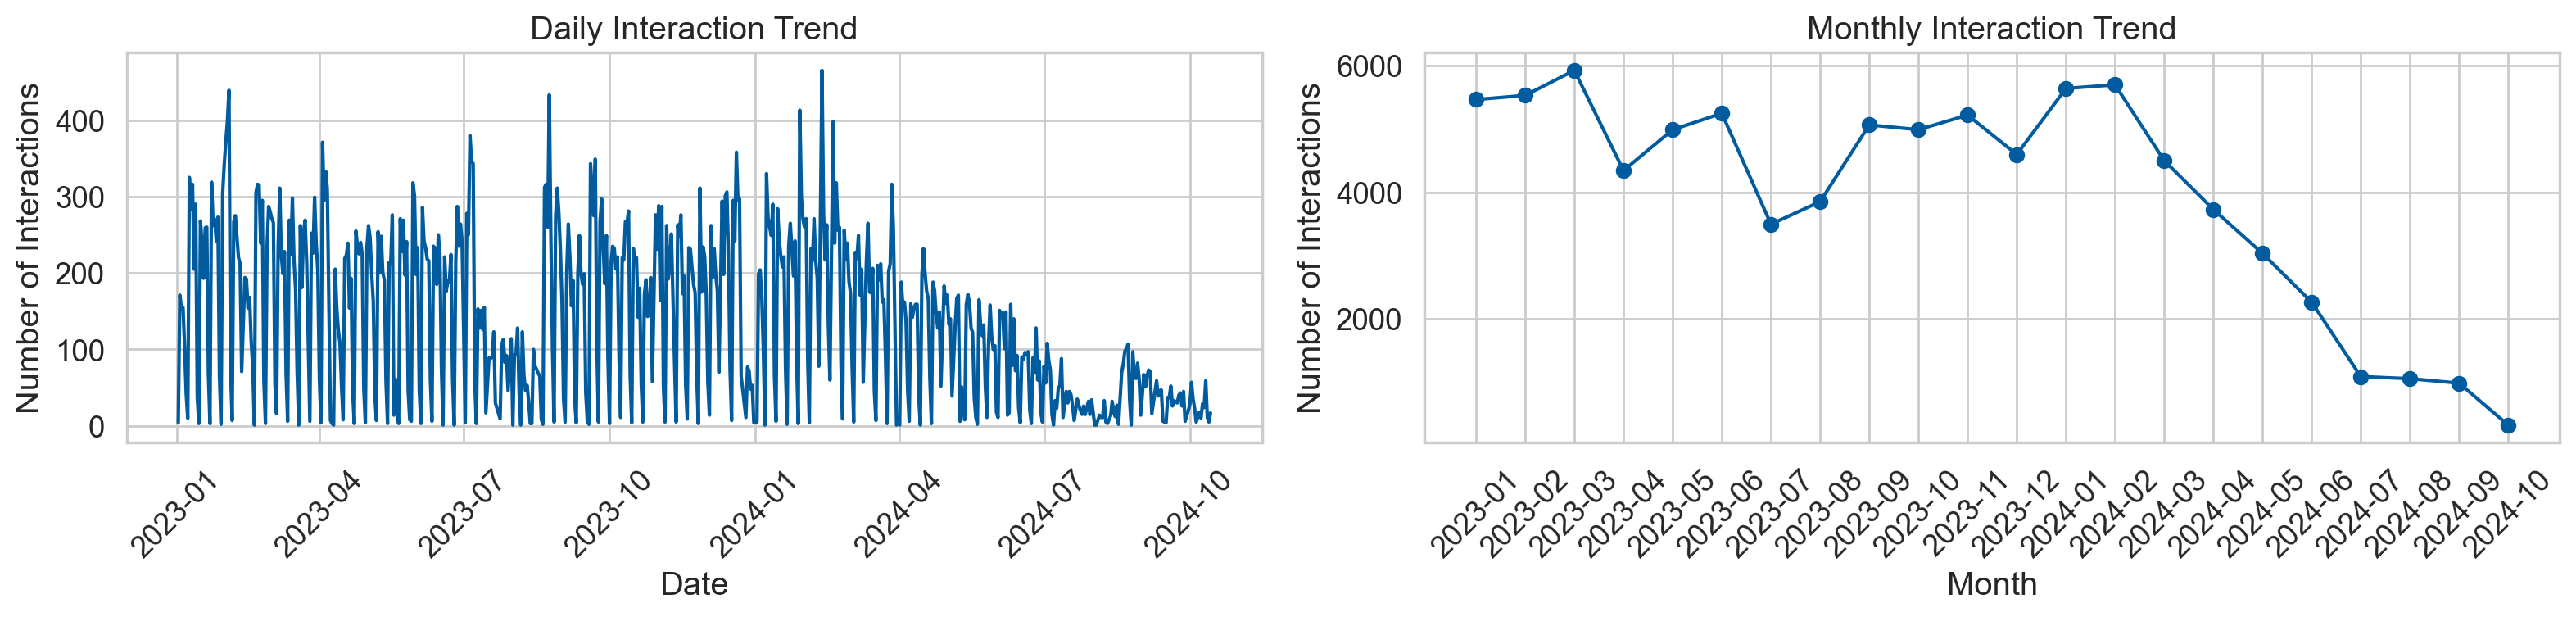

In [62]:
daily_counts = interactions.groupby(interactions['t_dt'].dt.date).size()
monthly_counts = interactions.groupby(interactions['t_dt'].dt.to_period('M')).size()

fig, axes = plt.subplots(1, 2, figsize=(16, 4))  # 1 row, 2 columns

# Daily trend
axes[0].plot(daily_counts.index, daily_counts.values)
axes[0].set_title("Daily Interaction Trend")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Number of Interactions")
axes[0].tick_params(axis='x', rotation=45)

# Monthly trend
axes[1].plot(monthly_counts.index.astype(str), monthly_counts.values, marker='o')
axes[1].set_title("Monthly Interaction Trend")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Number of Interactions")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 2.2. Borrowing Patterns
- Weekday (Mon–Sun)
- Hour of day

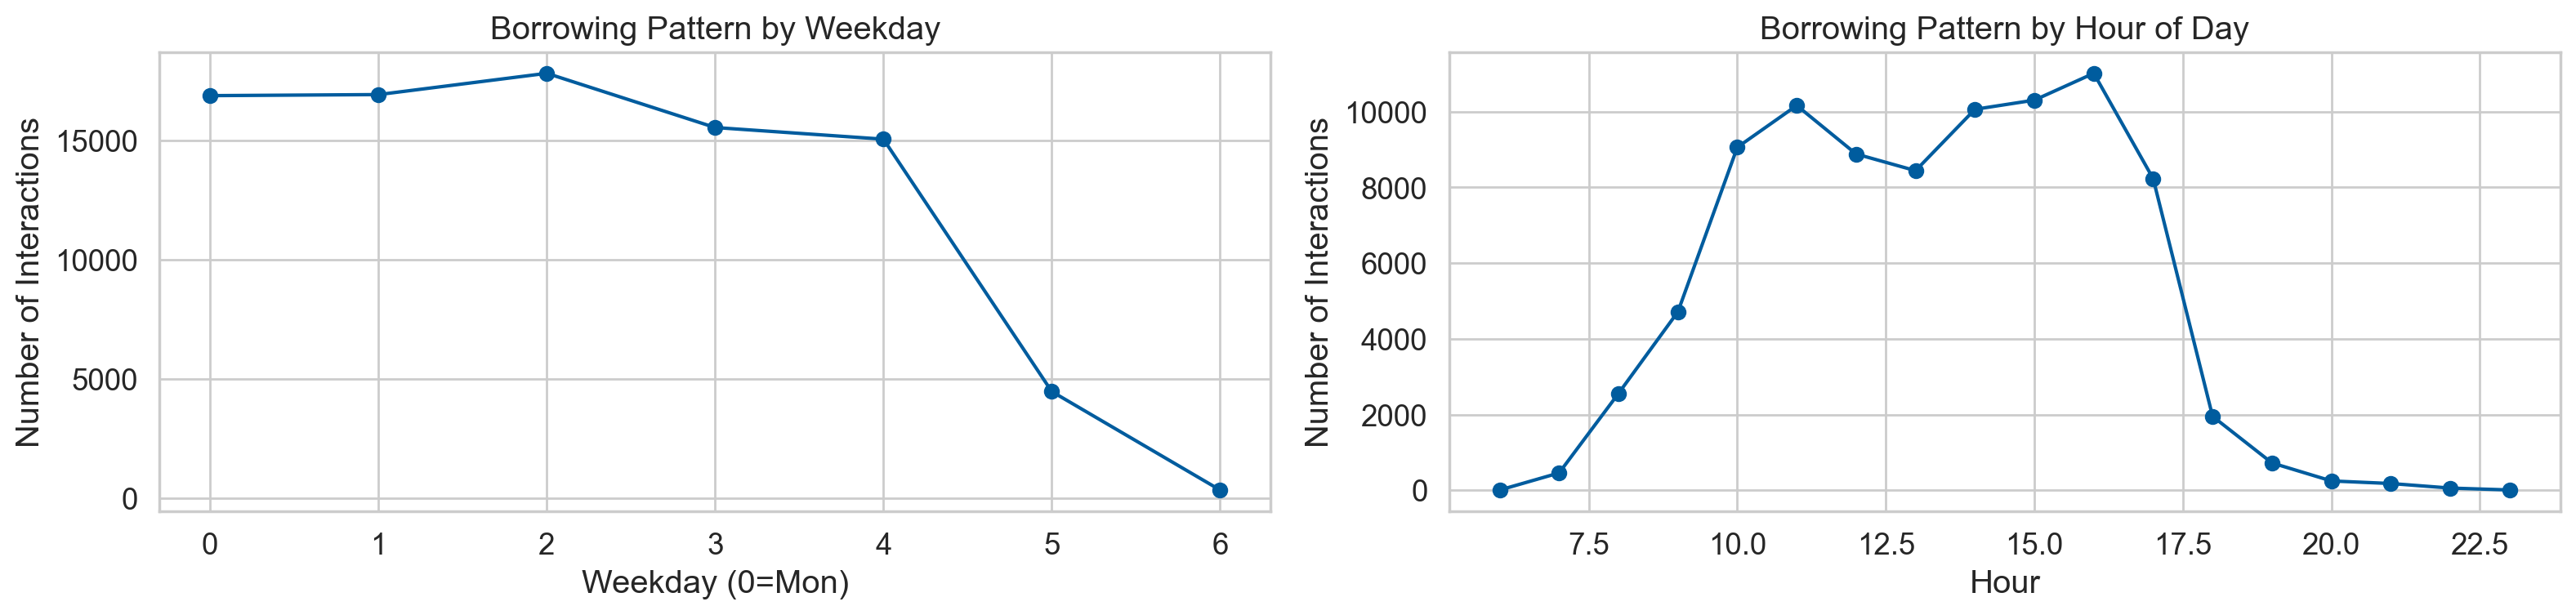

In [60]:
interactions['weekday'] = interactions['t_dt'].dt.weekday  # 0 = Monday
interactions['hour'] = interactions['t_dt'].dt.hour

weekday_counts = interactions['weekday'].value_counts().sort_index()
hour_counts = interactions['hour'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 4))  # 1 row, 2 columns

# Weekday pattern
axes[0].plot(weekday_counts.index, weekday_counts.values, marker='o')
axes[0].set_title("Borrowing Pattern by Weekday")
axes[0].set_xlabel("Weekday (0=Mon)")
axes[0].set_ylabel("Number of Interactions")

# Hour-of-day pattern
axes[1].plot(hour_counts.index, hour_counts.values, marker='o')
axes[1].set_title("Borrowing Pattern by Hour of Day")
axes[1].set_xlabel("Hour")
axes[1].set_ylabel("Number of Interactions")

plt.tight_layout()
plt.show()

### 2.3. Timestamp anomaly checks

In [32]:
print("Min datetime:", interactions['t_dt'].min())
print("Max datetime:", interactions['t_dt'].max())
print("Negative timestamps:", (interactions['t'] < 0).sum())
print("Duplicate interactions (u, i, t):", interactions.duplicated(subset=['u','i','t']).sum())

Min datetime: 2023-01-02 12:47:23
Max datetime: 2024-10-14 16:57:34
Negative timestamps: 0
Duplicate interactions (u, i, t): 2


## 3. Sparsity & Interaction Structure

Exploring the core of our recommendation system:

- **User activity distribution**: How many interactions does each user have?
- **Item popularity distribution**: Which books are most frequently borrowed?
- **Long-tail behavior**: Are most users/items rare while a few dominate?
- **Sparsity of the user-item matrix**: How dense or sparse is the interaction data?
- **Cold-start users**: Users who appear only once in the dataset.
- **Cold-start items**: Books that have been interacted with only once.


### 3.1.Analyze **Subjects/Publisher** distribution

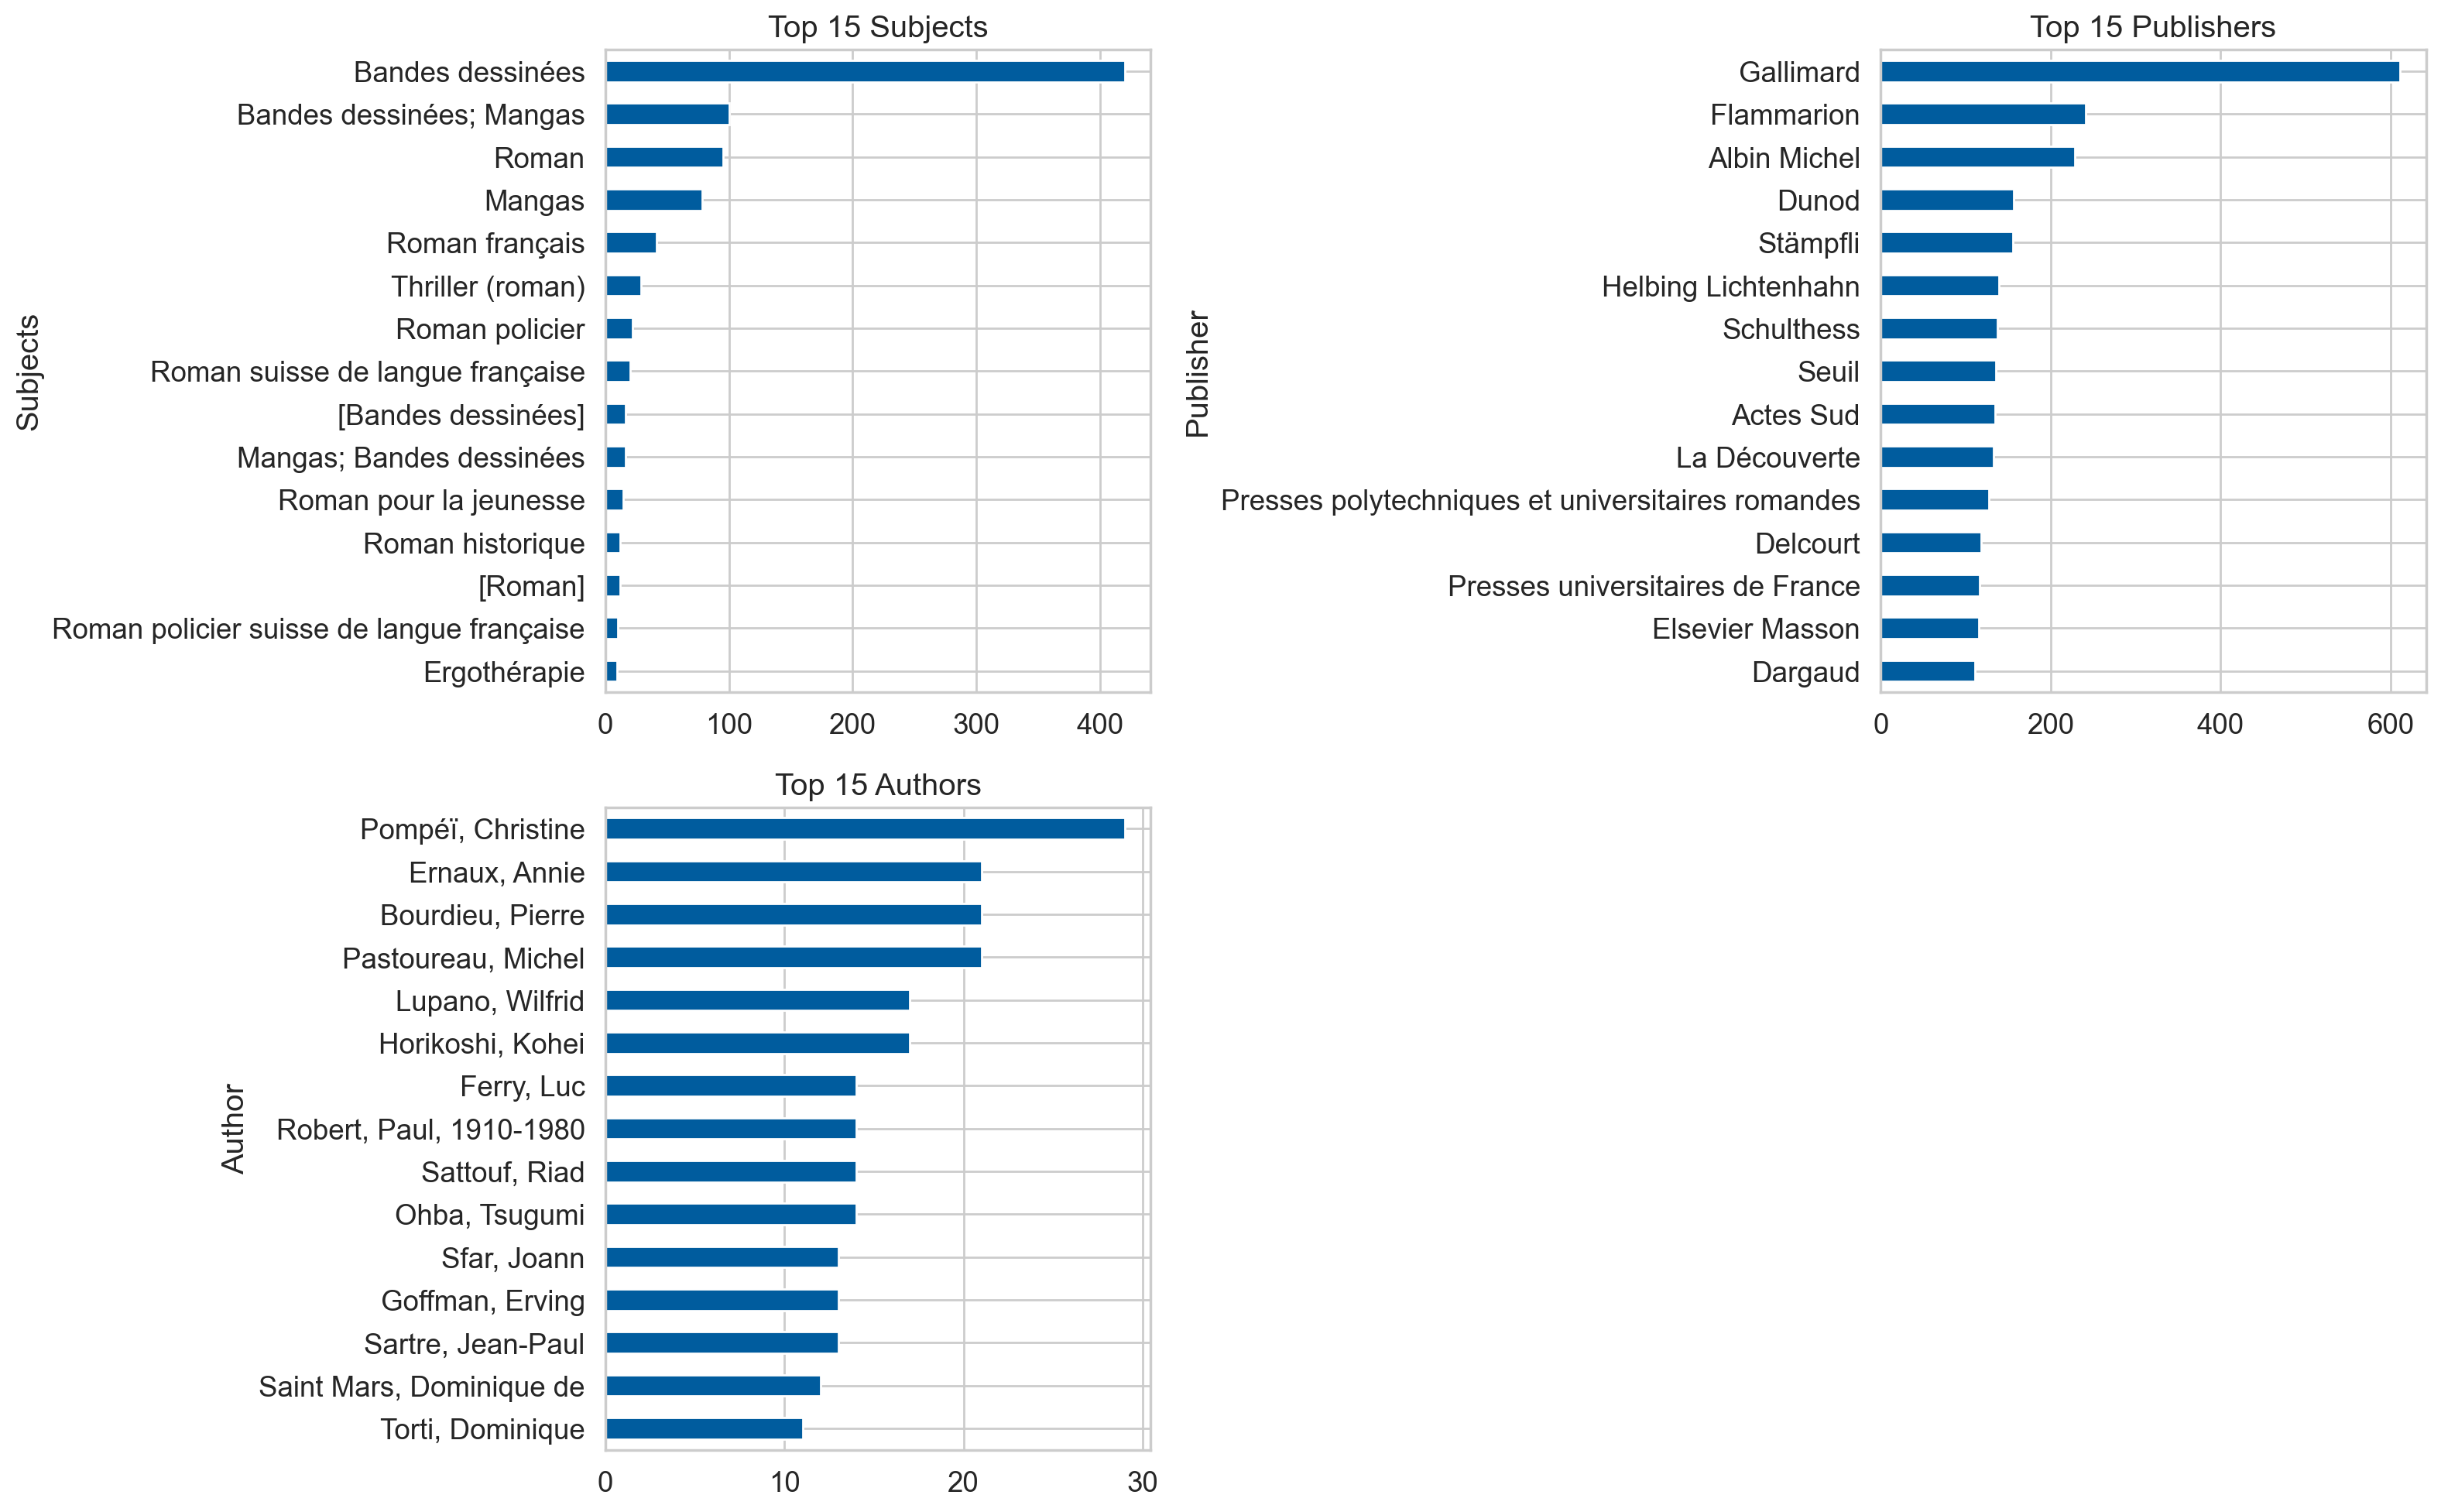

In [59]:
top_subjects = items['Subjects'].value_counts().head(15)
top_publishers = items['Publisher'].value_counts().head(15)
top_authors = items['Author'].value_counts().head(15)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # 2 rows, 2 columns

# Top Subjects (first row, left)
top_subjects.plot(kind='barh', ax=axes[0,0])
axes[0,0].set_title("Top 15 Subjects")
axes[0,0].invert_yaxis()

# Top Publishers (first row, right)
top_publishers.plot(kind='barh', ax=axes[0,1])
axes[0,1].set_title("Top 15 Publishers")
axes[0,1].invert_yaxis()

# Top Authors (second row, left)
top_authors.plot(kind='barh', ax=axes[1,0])
axes[1,0].set_title("Top 15 Authors")
axes[1,0].invert_yaxis()

# Hide the empty subplot (second row, right)
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

### 3.2.User/Item interaction distribution

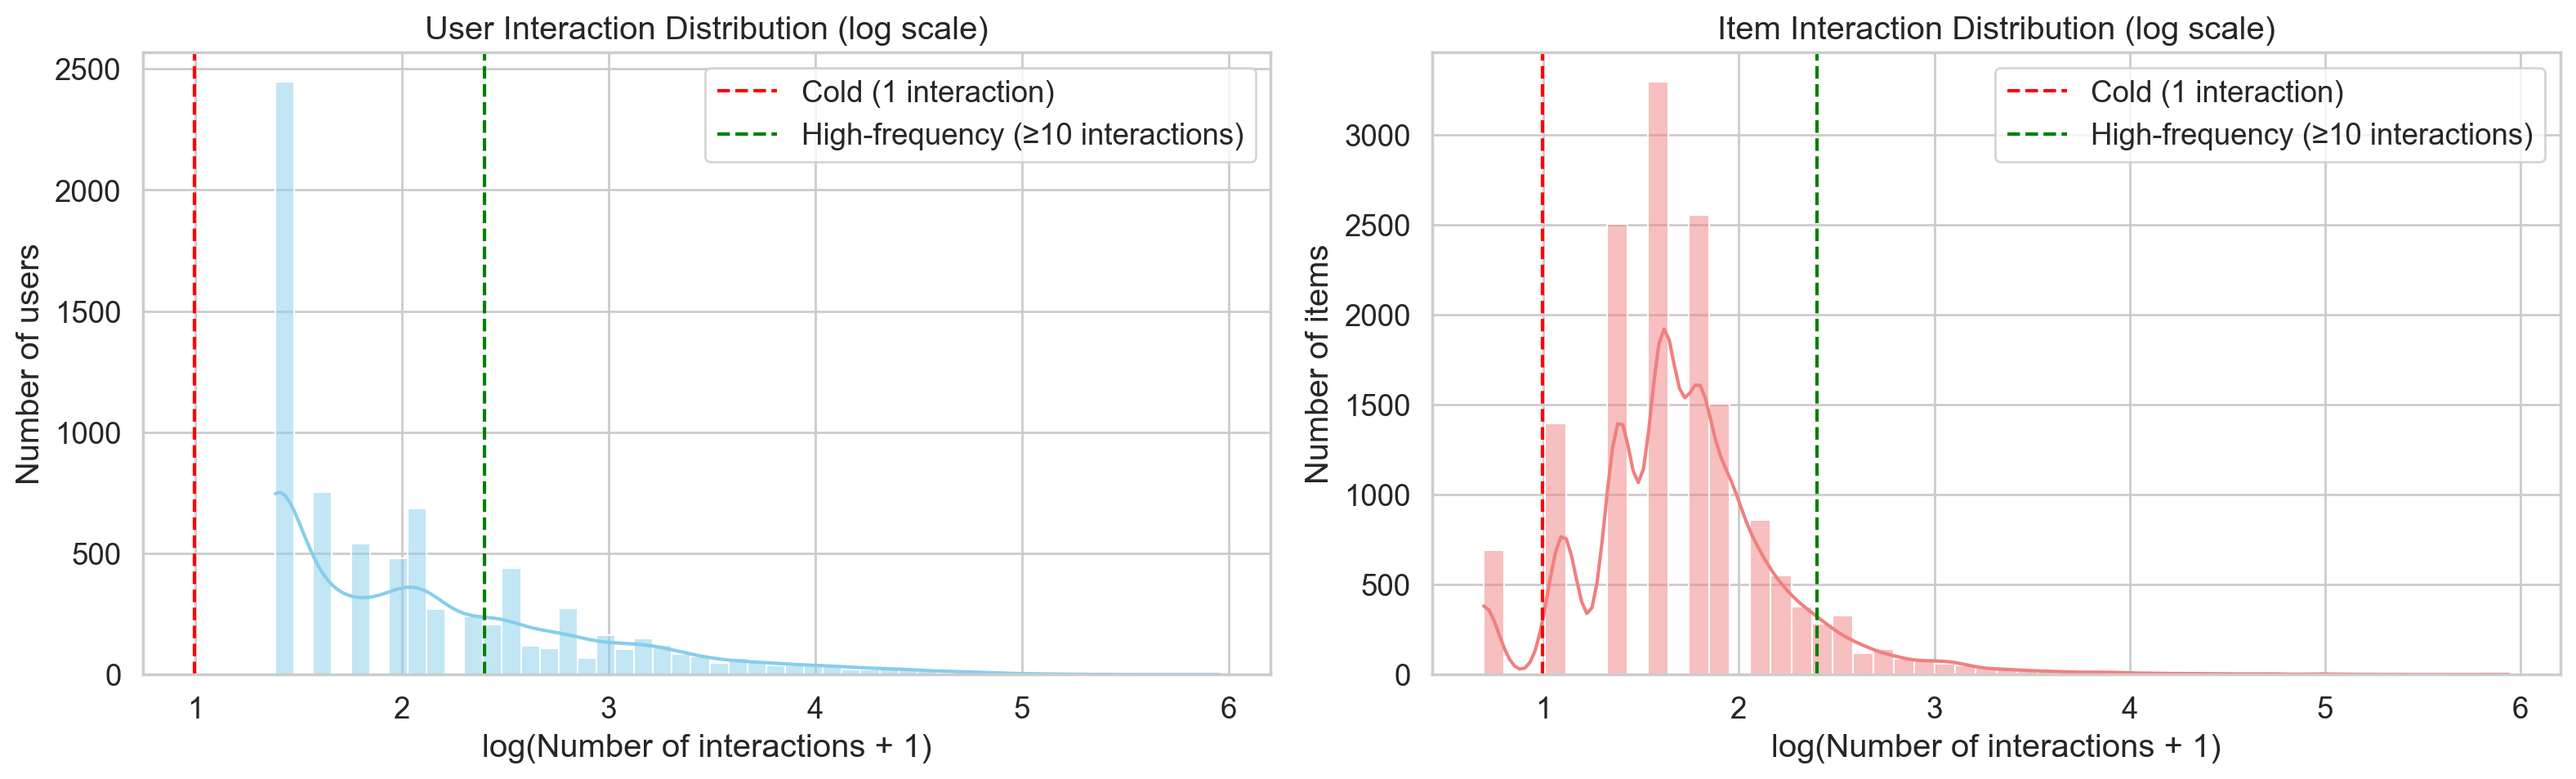

Number of cold-start users (only 1 interaction): 0
Number of cold-start items (only 1 interaction): 692


In [85]:
# Compute interaction counts
user_activity = interactions['u'].value_counts()
item_popularity = interactions['i'].value_counts()

# Define thresholds for cold (1 interaction) and high-frequency (example: ≥10 interactions)
cold_threshold = 1.7
high_threshold = 10

fig, axes = plt.subplots(1, 2, figsize=(16, 5))  # 1 row, 2 columns

# Left subplot: User interaction distribution (log scale)
sns.histplot(np.log1p(user_activity), bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("User Interaction Distribution (log scale)")
axes[0].set_xlabel("log(Number of interactions + 1)")
axes[0].set_ylabel("Number of users")

# Mark cold and high-frequency regions
axes[0].axvline(np.log1p(cold_threshold), color='red', linestyle='--', label='Cold (1 interaction)')
axes[0].axvline(np.log1p(high_threshold), color='green', linestyle='--', label='High-frequency (≥10 interactions)')
axes[0].legend()

# Right subplot: Item interaction distribution (log scale)
sns.histplot(np.log1p(item_popularity), bins=50, kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title("Item Interaction Distribution (log scale)")
axes[1].set_xlabel("log(Number of interactions + 1)")
axes[1].set_ylabel("Number of items")

# Mark cold and high-frequency regions
axes[1].axvline(np.log1p(cold_threshold), color='red', linestyle='--', label='Cold (1 interaction)')
axes[1].axvline(np.log1p(high_threshold), color='green', linestyle='--', label='High-frequency (≥10 interactions)')
axes[1].legend()

plt.tight_layout()
plt.show()

# Cold-start counts
cold_start_users = (user_activity == 1).sum()
cold_start_items = (item_popularity == 1).sum()
print(f"Number of cold-start users (only 1 interaction): {cold_start_users}")
print(f"Number of cold-start items (only 1 interaction): {cold_start_items}")

### 3.3. User-Item sparse matrix degree

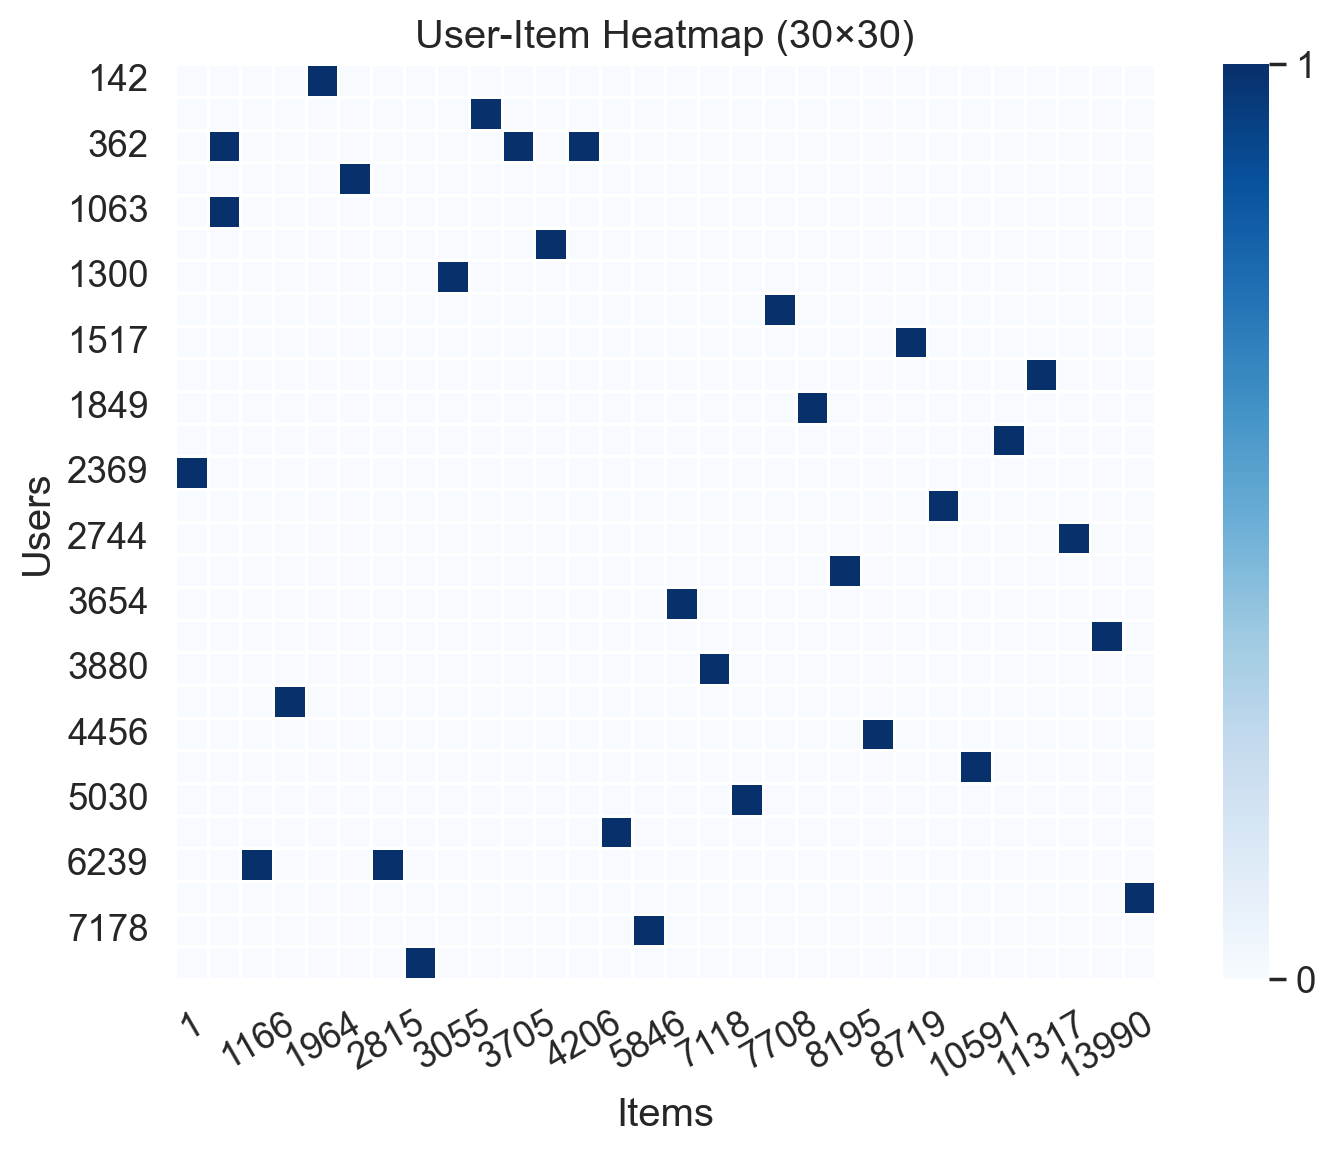

Number of users: 7838
Number of items: 15109
Total interactions: 87047
Sparsity of user-item matrix: 0.9993


In [97]:
# Smaller sample
top_users = interactions['u'].unique()[:30]
top_items = interactions['i'].unique()[:30]
subset = interactions[interactions['u'].isin(top_users) & interactions['i'].isin(top_items)]

# Pivot table
user_item_matrix = subset.pivot_table(index='u', columns='i', values='t', aggfunc='max').fillna(0)

plt.figure(figsize=(8,6))
sns.heatmap(
    user_item_matrix>0,          # binary interaction
    cmap='Blues',              # reversed Blues: darker = more prominent
    cbar=True,
    cbar_kws={'ticks':[0,1]},   # only show 0 and 1
    linewidths=0.5,
    linecolor='white',           # white gridlines for contrast
    square=True
)
plt.title("User-Item Heatmap (30×30)")
plt.xlabel("Items")
plt.ylabel("Users")
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Number of users, items, and interactions
num_users = interactions['u'].nunique()
num_items = interactions['i'].nunique()
num_interactions = len(interactions)

# Sparsity calculation
sparsity = 1 - num_interactions / (num_users * num_items)
print(f"Number of users: {num_users}")
print(f"Number of items: {num_items}")
print(f"Total interactions: {num_interactions}")
print(f"Sparsity of user-item matrix: {sparsity:.4f}")

## 4. Data Cleaning Strategy

Deciding how to prepare the data for the recommendation system:

- **Handling cold-start**: How to deal with new users or items with very few interactions.
- **Filtering rare items**: Should items that appear only once be removed or kept.
- **Parsing multiple ISBNs**: How to handle books with multiple ISBN values.
- **Handling multi-label Subjects**: How to process books with multiple subject tags.
- **Filling missing Authors**: Should missing author information be imputed or left as is.
- **Filtering low-activity users**: Whether to remove users with very few interactions.